In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

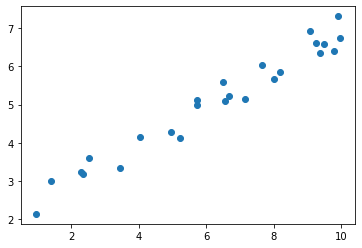

In [2]:
## Creating random data for linear regression model
m, c = 0.50, 2
x, y = [], []
for i in range(25):    
    x.append(random.uniform(0, 10))
    
for xx in x:
    error = random.uniform(-1, 1)/1.5
    y.append(((xx*m)+error) + c)
    
plt.scatter(x, y)
plt.show()

## Linear regression using OLS
 B0 = ∑ ( (xi - mean(x) * (yi - mean(y)) ) / ∑(xi - mean(x))<br>
 B1 = ∑ (mean(y) - B0 * mean(x))^2

In [3]:
## Calculating co-effecients
b0 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum(np.square(x - np.mean(x)))
b1 = np.mean(y) - (b0 * np.mean(x))
print(b0, b1)

0.48365773294939557 2.0451086297531087


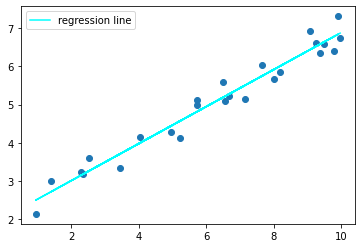

In [4]:
## Calculating and plotting predictions
yhat = []
for xx in x:
    yhat.append(b0*xx + b1)
    
plt.scatter(x, y)   
plt.plot(x, yhat, c = 'cyan', label = 'regression line')
plt.legend()
plt.show()

In [5]:
## Calculating the error
import math
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return math.sqrt(mean_error)
print(rmse_metric(y, yhat))

0.28313260277479846


## Implementing linear regression using gradient descent

error = prediction - error <br>
b1 := b1 - learning_rate * error(t) * x(t) <br>
b0 := b0 - learning_rate * error(t)<br>

yhat = b0 + b1 * x(t)

## Stochastic Gradient Descent 
Iterates over each example at a time to calculate cost

In [29]:
sum_error = []
epochs , learning_rate = 1000, 0.001
b0, b1 = 0.00, 0.00
costs, rmses = [], []
for epoch in range(epochs):
    
    yhats = []
    for i, xx in enumerate(x):
        yhat = b1 + b0 * xx
        
        error = yhat - y[i]
        b0 -= learning_rate * error * xx
        b1 -= learning_rate * error
        
        yhats.append(yhat)
        sum_error.append(error)
        
        cost = error ** 2
        costs.append(cost)
    mean_error = np.mean(sum_error)
    rmse = rmse_metric(y, yhats)
    rmses.append(rmse)
    if epoch in range(0, epochs, 100):
        print(f'epoch : {epoch} cost: {round(cost, 4)}, rmse: {rmse}')

epoch : 0 cost: 2.4733, rmse: 3.37095245775297
epoch : 100 cost: 0.3538, rmse: 0.6034688705010391
epoch : 200 cost: 0.1944, rmse: 0.4513891430962186
epoch : 300 cost: 0.1156, rmse: 0.36748396900962665
epoch : 400 cost: 0.075, rmse: 0.3250830608357232
epoch : 500 cost: 0.0531, rmse: 0.3052355738046451
epoch : 600 cost: 0.0408, rmse: 0.2964217618774413
epoch : 700 cost: 0.0336, rmse: 0.29263581360827456
epoch : 800 cost: 0.0293, rmse: 0.291049109669745
epoch : 900 cost: 0.0266, rmse: 0.290401202859146


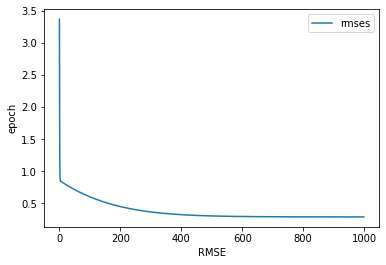

In [30]:
plt.plot([i for i in range(len(rmses))], rmses, label = 'rmses')
plt.xlabel('RMSE')
plt.ylabel('epoch')
plt.legend()
plt.show()

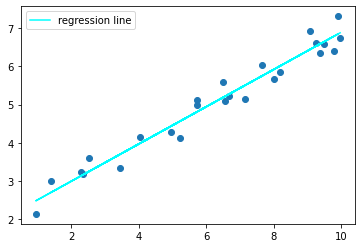

In [31]:
## Calculating and plotting predictions
yhat = []
for xx in x:
    yhat.append(b0*xx + b1)
    
plt.scatter(x, y)   
plt.plot(x, yhat, c = 'cyan', label = 'regression line')
plt.legend()
plt.show()

In [32]:
print(b0, b1)

0.48662557589874955 2.0238462106229167
